# Apply ROIs, PCA

In [12]:
import numpy as np
from nilearn import image
from nilearn.image import load_img
from nilearn.masking import apply_mask
from nilearn.plotting import plot_img, plot_roi, plot_anat

In [2]:
img = image.load_img("data/sub-001/func/swasub-001_task-stroop_bold.nii")

In [3]:
mask = image.load_img("ROIs/left_retrieval.nii.gz")

In [8]:
roi = mask.get_fdata()

In [18]:
np.all(np.isclose(roi[:, :, :, 0], roi[:, :, :, 1]))

False

## Left Retrieval

In [25]:
left_retrieval_roi = apply_mask(img, image.index_img(mask, 0))

In [30]:
import matplotlib.pyplot as plt

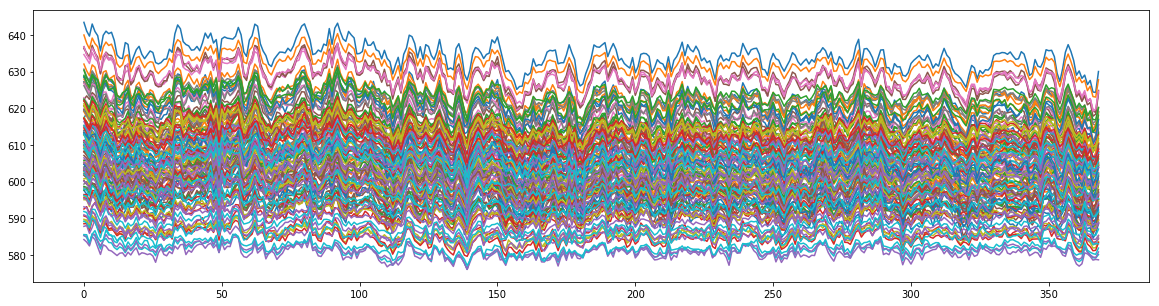

In [35]:
fig = plt.figure()
plt.plot(left_retrieval_roi)
fig.set_size_inches(20, 5)

## PCA

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [80]:
# normalize data

In [82]:
scaler = StandardScaler()
scaler.fit(left_retrieval_roi)
normalized = scaler.transform(left_retrieval_roi)

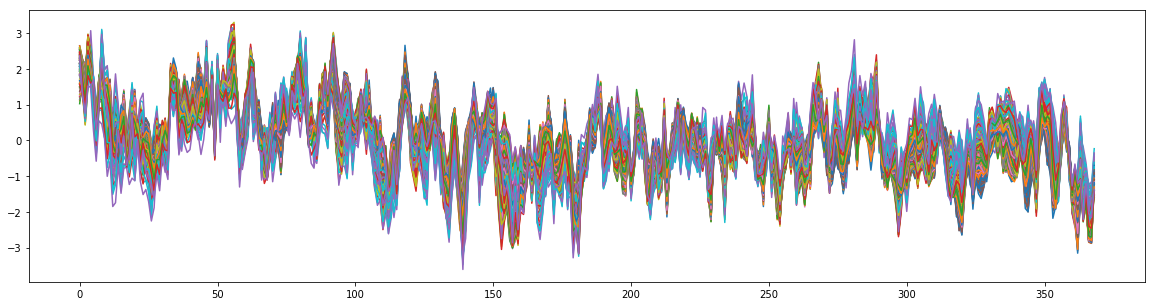

In [84]:
fig = plt.figure()
plt.plot(normalized)
fig.set_size_inches(20, 5)

In [105]:
pca = PCA(n_components=10)

In [106]:
pca.fit(normalized)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [107]:
# project data

In [108]:
projected = pca.transform(left_retrieval_roi)

In [109]:
var_projected = np.sum(np.var(projected, axis=0))
var_original = np.sum(np.var(left_retrieval_roi, axis=0))

In [110]:
# percentage of variance explained
var_projected / var_original

0.9916187437679485

## All ROIs?

In [111]:
import os

In [122]:
def extract_all_roi(img):
    rois = [i for i in os.listdir("ROIs") if i.endswith(".nii.gz")]
    data = None
    for roi in rois:
        mask = image.load_img(os.path.join("ROIs", roi))
        if data is None:
            data = apply_mask(img, image.index_img(mask, 0))
        else:
            data = np.concatenate((apply_mask(img, image.index_img(mask, 0)), data), axis=1)
        print("{} done".format(roi))
    return data

In [123]:
roi_data = extract_all_roi(img)

left_manual.nii.gz done
right_retrieval.nii.gz done
right_imaginal.nii.gz done
left_visual.nii.gz done
left_imaginal.nii.gz done
right_manual.nii.gz done
left_retrieval.nii.gz done
right_visual.nii.gz done


In [124]:
roi_data.shape

(369, 1000)

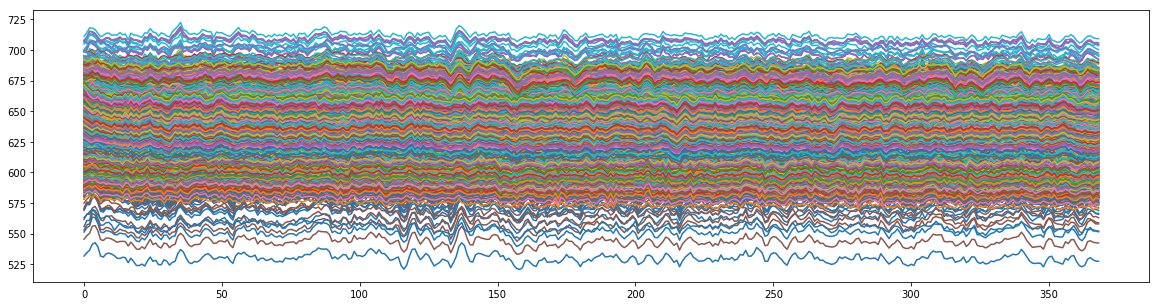

In [125]:
fig = plt.figure()
plt.plot(roi_data)
fig.set_size_inches(20, 5)

In [126]:
normalized_roi = scaler.fit_transform(roi_data)

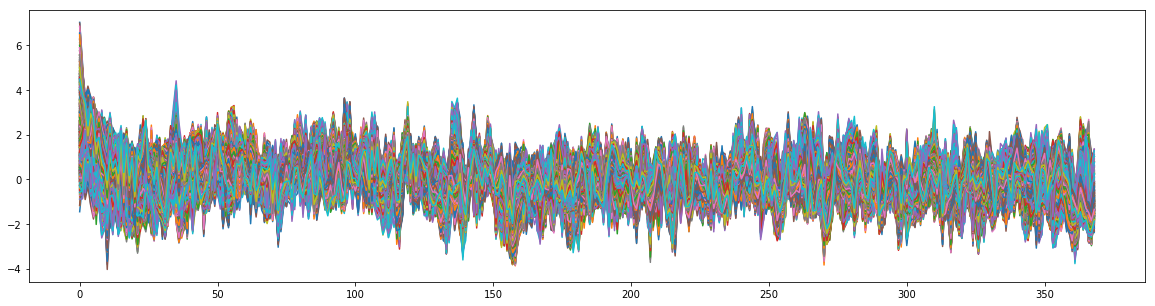

In [127]:
fig = plt.figure()
plt.plot(normalized_roi)
fig.set_size_inches(20, 5)

In [155]:
pca = PCA(n_components=10)
pca.fit(normalized_roi)
projected_roi = pca.transform(roi_data)

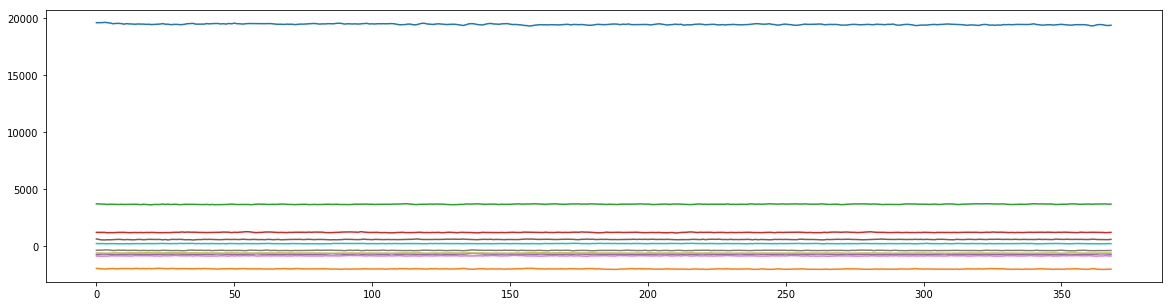

In [156]:
fig = plt.figure()
plt.plot(projected_roi)
fig.set_size_inches(20, 5)

In [157]:
var_projected = np.sum(np.var(projected_roi, axis=0))
var_original = np.sum(np.var(roi_data, axis=0))

In [158]:
var_projected / var_original

0.8526597550133229